# Recipe Site Traffic 2

## 1. Define the Problem and Project Objectives
Tasty Bytes has today a manual mechanism to select the recipe to be displayed on the home page. Picking a 'popular' recipe has a positive impact of up to 40% in traffic in the rest of the website, leading to more subscriptions and therefore, more revenue.

The goal of this notebook is to perform an analysis on: 
- how to predict which recipes will be popular 80% of the time (accuracy)
- and minimize the chance of showing unpopular recipes (precision)

The provided dataset to perform this analysis is available in the file recipe_site_traffic_2212.csv and contains the following fields: 

| Column Name   | Details                                                                                                       |
|---------------|---------------------------------------------------------------------------------------------------------------|
| recipe        | Numeric, unique identifier of recipe                                                                          |
| calories      | Numeric, number of calories                                                                                   |
| carbohydrate  | Numeric, amount of carbohydrates in grams                                                                     |
| sugar         | Numeric, amount of sugar in grams                                                                             |
| protein       | Numeric, amount of protein in grams                                                                           |
| category      | Character, type of recipe. Recipes are listed in one of ten possible groupings ('Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', '

## 2. Data Collection and Understanding

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Lets read the data and have a first idea about its quality regarding types and null values.

In [2]:
df = pd.read_csv('recipe_site_traffic_2212.csv')


In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

There are nulls in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


- The *servings* feature should be numeric
- *high_traffic* can be boolean and has nulls too

In [6]:
df['recipe'].nunique()

947

In [7]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


The range of *calories* seems way over the other ones.

In [8]:
df[df['calories'].isna()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,NaN
48,49,NaN,NaN,NaN,NaN,Chicken Breast,4,NaN
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken Breast,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [9]:
df.shape

(947, 8)

After a first look to the dataset, we can conclude: 
- We have 947 recipes 
- We have 6 independent variables and one target (high_traffic)
- 4 of the features have 2 null values, all of them corresponding to the same rows. These null values correspond to different 'categories' and serving values
- The target variable contains 377 null values that should be encoded as 'False' as estated in the data dictionary provided.
- The serving feature, supposed to contain integers, contain 3 faulty entries that must be cleaned.


## 3. Data Cleaning

### 3.1. Category type

The category feature has been loaded as an 'object'. We can encode it as a category. It will help us save some memory.

In [10]:
df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [11]:
df['category'] = df['category'].astype('category')

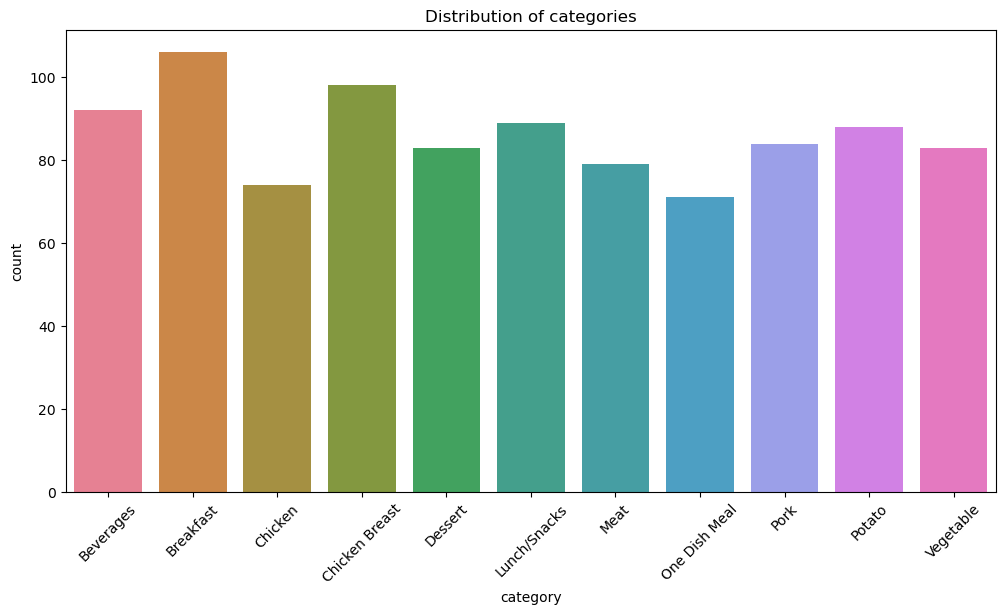

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', hue='category')
plt.xticks(rotation=45)
plt.title('Distribution of categories')
plt.show()

### 3.2. Servings non numeric

Some of the servings are non numeric

In [13]:
df['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

There are 3 weird serving values. Lets clean them up. And lets consider servings as a category rather than a numeric field.

In [14]:
df['servings'] = df['servings'].str[0].astype('category')

<Axes: xlabel='servings', ylabel='count'>

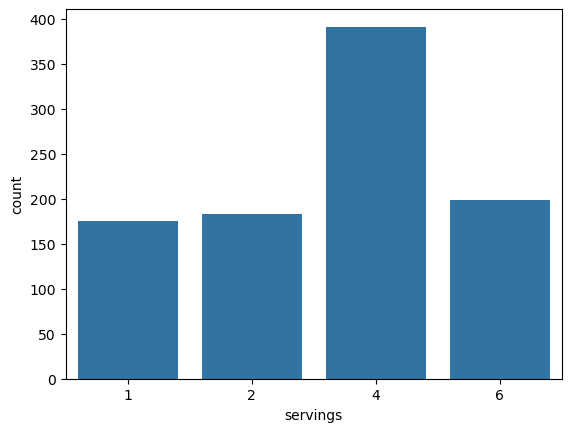

In [15]:
sns.countplot(data=df, x='servings')

### 3.3. Null values in Calories, Protein, Carbohydrate and Sugar

Since the nature of this issue seems pretty similar, lets group these features.

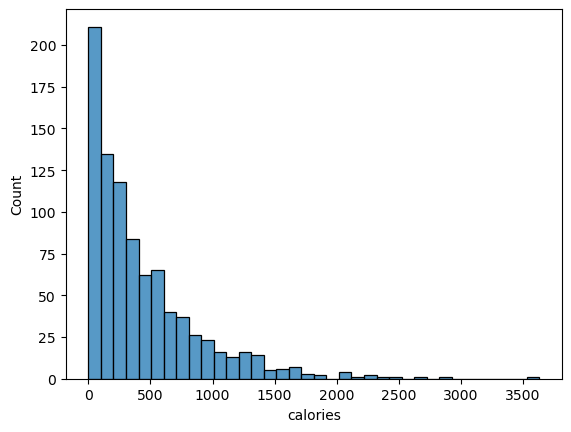

In [16]:
sns.histplot(data=df.calories)
plt.show()

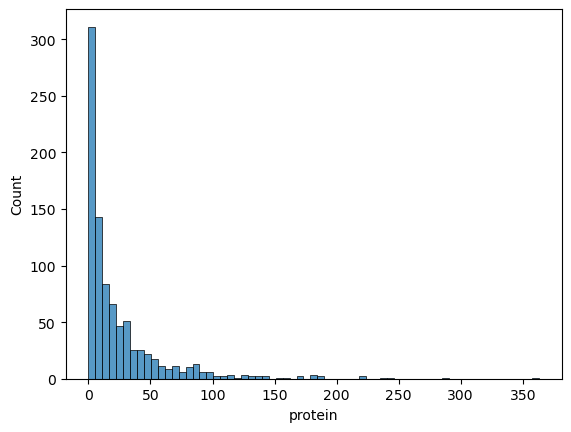

In [17]:
sns.histplot(data=df.protein)
plt.show()

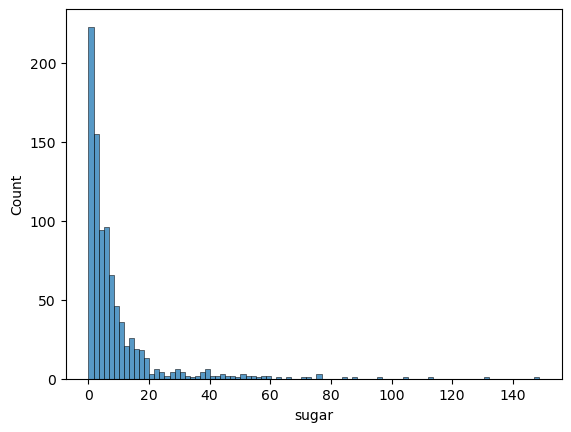

In [18]:
sns.histplot(data=df.sugar)
plt.show()

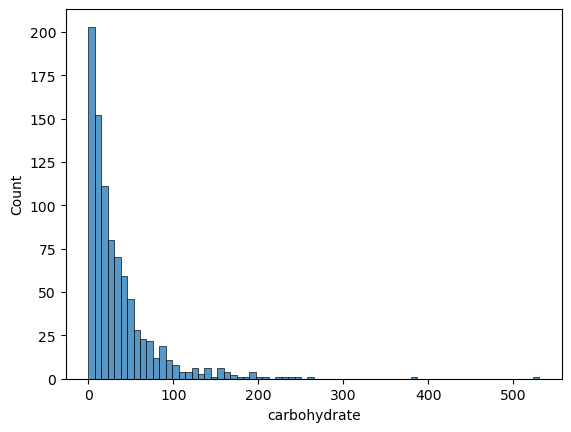

In [19]:
sns.histplot(data=df.carbohydrate)
plt.show()

The distributions of all these 4 numeric features is highly skewed to the right.

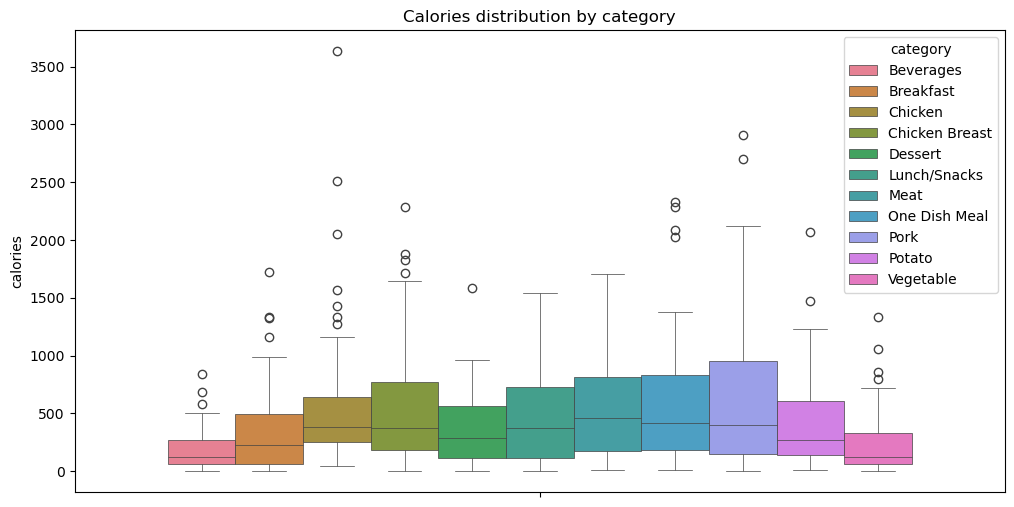

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='category', y='calories', linewidth=0.5)
plt.title('Calories distribution by category')
plt.show()

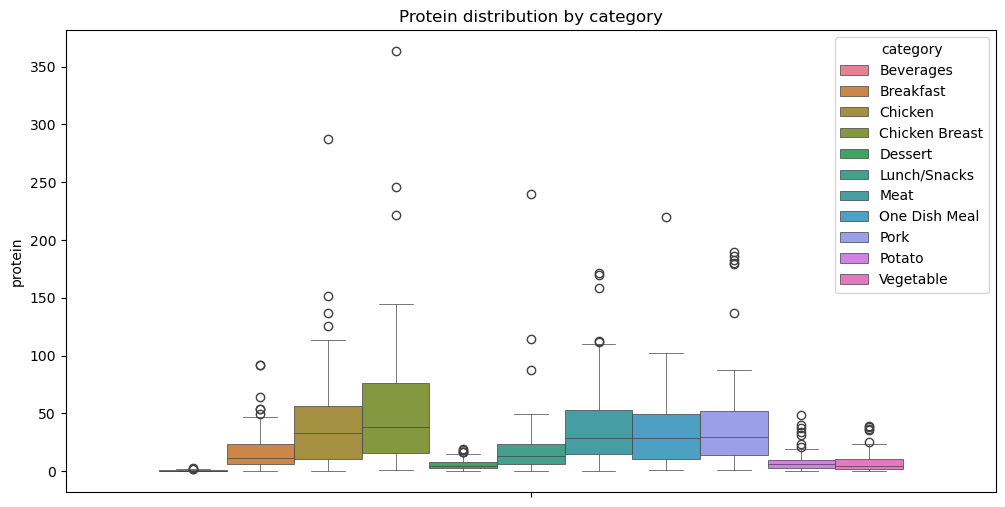

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='category', y='protein', linewidth=0.5)
plt.title('Protein distribution by category')
plt.show()

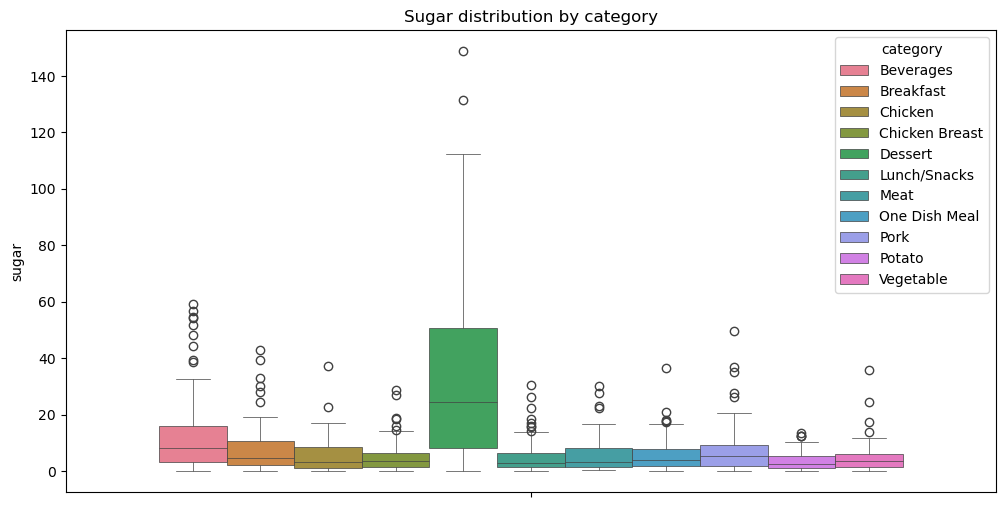

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='category', y='sugar', linewidth=0.5)
plt.title('Sugar distribution by category')
plt.show()

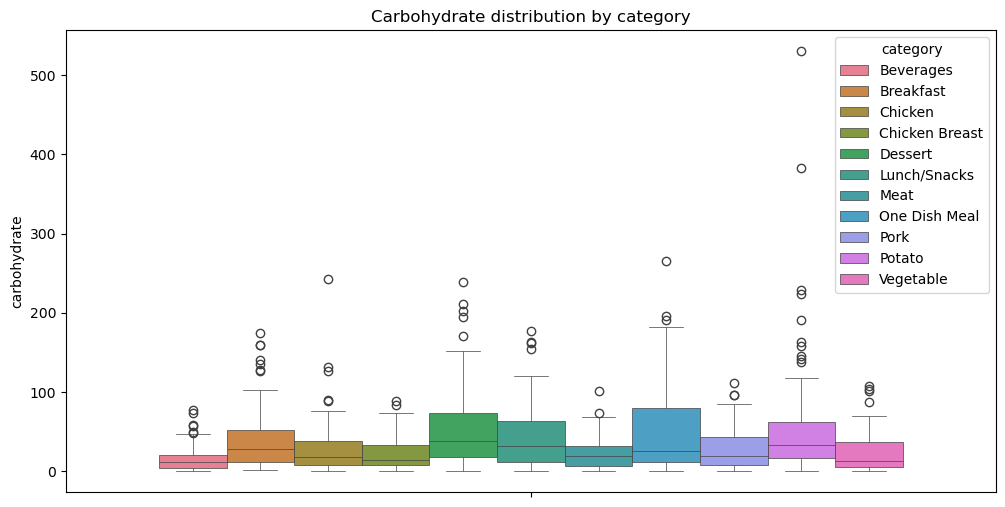

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='category', y='carbohydrate', linewidth=0.5)
plt.title('Carbohydrate distribution by category')
plt.show()

<Axes: ylabel='protein'>

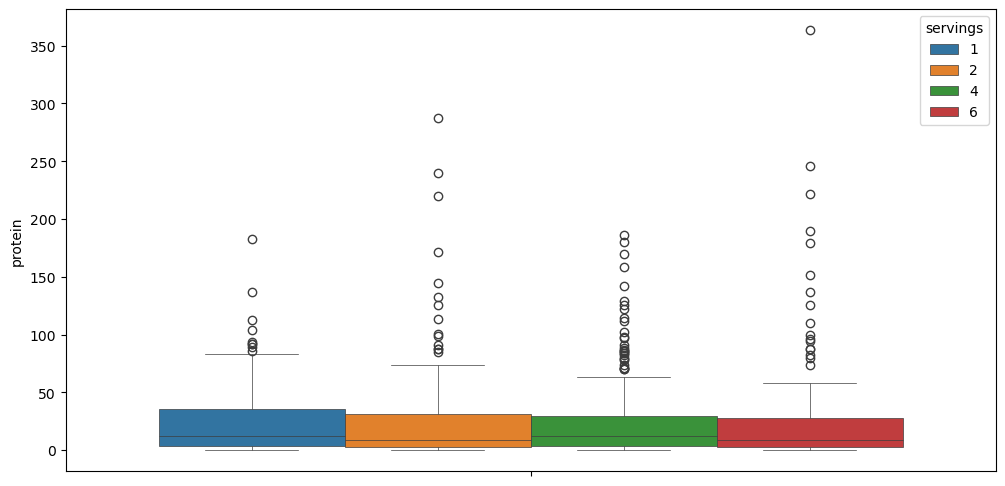

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='servings', y='protein', linewidth=0.5)

<Axes: ylabel='sugar'>

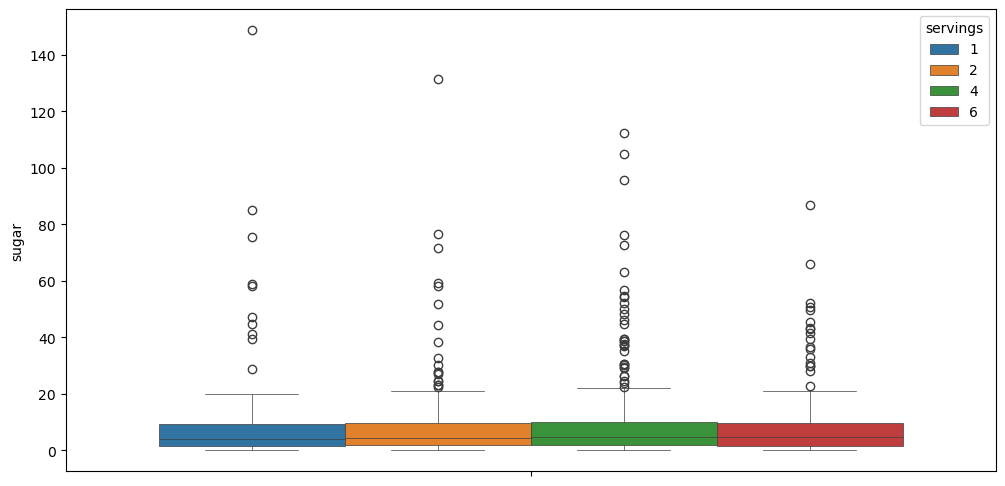

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='servings', y='sugar', linewidth=0.5)

<Axes: ylabel='calories'>

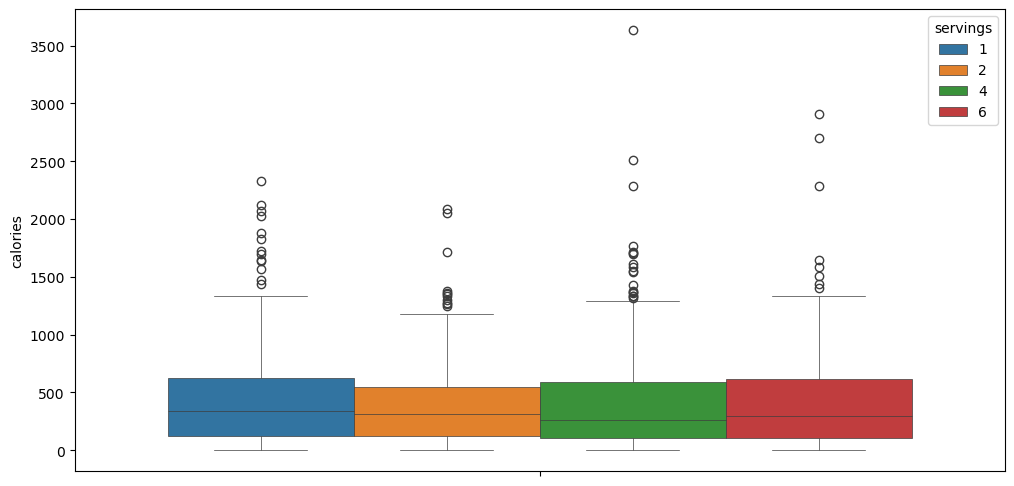

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='servings', y='calories', linewidth=0.5)

<Axes: ylabel='carbohydrate'>

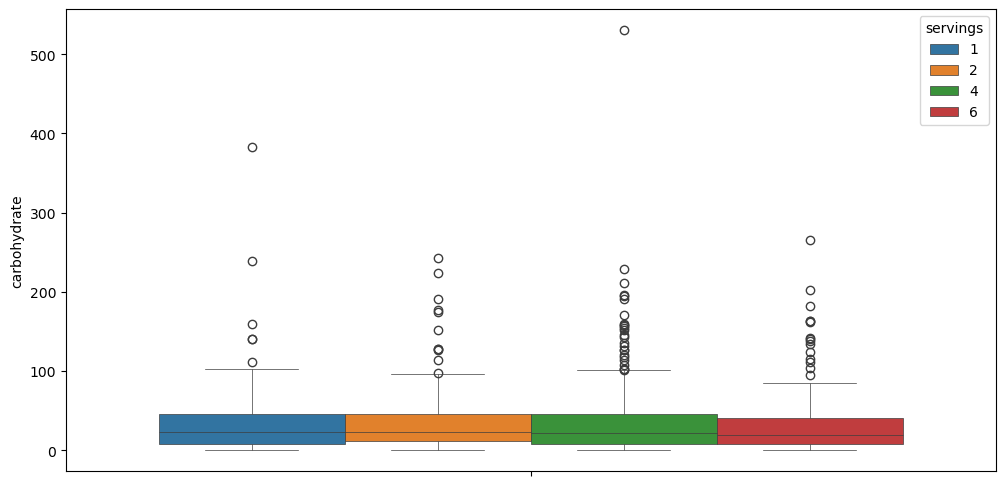

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='servings', y='carbohydrate', linewidth=0.5)

Lets impute the missing calories, sugar, protein and carbohydrate with the mean for each category. I initially thought about using the servings feature to refine the mean to be imputed, but it seems there is no variation in these columns due to the amout of servings.

In [28]:
for column in ['sugar', 'calories', 'protein', 'carbohydrate']:
    df[column] = df.groupby('category')[column].transform(lambda x: x.fillna(x.mean()))


/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_5790/1793308500.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[column] = df.groupby('category')[column].transform(lambda x: x.fillna(x.mean()))


In [29]:
df.head(20)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.708082,28.076164,8.040137,43.797671,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,NaN
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,NaN
5,6,691.150000,3.460000,1.650000,53.930000,One Dish Meal,2,High
6,7,183.940000,47.950000,9.750000,46.710000,Chicken Breast,4,NaN
7,8,299.140000,3.170000,0.400000,32.400000,Lunch/Snacks,4,NaN
8,9,538.520000,3.780000,3.370000,3.790000,Pork,6,High
9,10,248.280000,48.540000,3.990000,113.850000,Chicken,2,NaN


Lets convert the target column into a boolean one, like that we get rid of the null values on this column too.

In [30]:
df['high_traffic'] = np.where(df['high_traffic'] == 'High', 1, 0)

In [31]:
df['high_traffic'].value_counts(normalize=True)

high_traffic
1    0.606125
0    0.393875
Name: proportion, dtype: float64

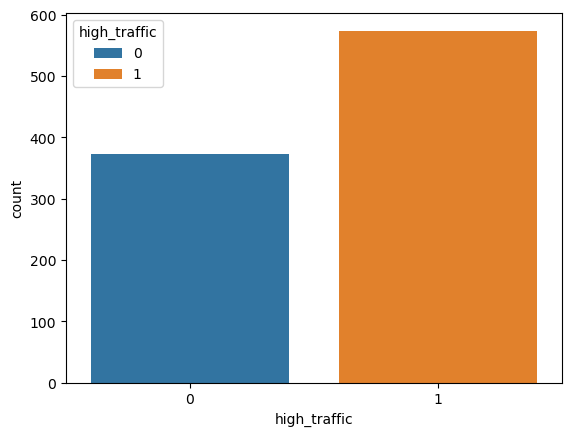

In [32]:
sns.countplot(data=df, x='high_traffic', hue='high_traffic')
plt.show()

If we randomly chose a recipe, it would be 60% of the times a high traffic one. This could be our baseline.

In [33]:
df.head(20)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.708082,28.076164,8.040137,43.797671,Pork,6,1
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,1
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,0
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,1
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,0
5,6,691.150000,3.460000,1.650000,53.930000,One Dish Meal,2,1
6,7,183.940000,47.950000,9.750000,46.710000,Chicken Breast,4,0
7,8,299.140000,3.170000,0.400000,32.400000,Lunch/Snacks,4,0
8,9,538.520000,3.780000,3.370000,3.790000,Pork,6,1
9,10,248.280000,48.540000,3.990000,113.850000,Chicken,2,0


In [34]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,high_traffic
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,439.426802,35.155739,9.059617,24.406565,0.606125
std,273.519652,441.546706,42.839862,14.441270,35.586491,0.488866
min,1.000000,0.140000,0.030000,0.010000,0.000000,0.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,0.000000
50%,474.000000,309.050000,22.620000,4.970000,11.240000,1.000000
75%,710.500000,594.475000,45.325000,9.565000,32.360000,1.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    category
 7   high_traffic  947 non-null    int64   
dtypes: category(2), float64(4), int64(2)
memory usage: 46.9 KB


The data seems clean now after having imputed missing values, fix wrong typing and clean messy servings. We are now ready to prepare the data to train a model.

Since the protein, sugar, carbo and calories columns were highly skewed we will apply a log transformation to normalize their distributions. This will normalize the features, reduce their ranges and the outliers, making the distributions more symmetric too. This should have a positive impact in the training.

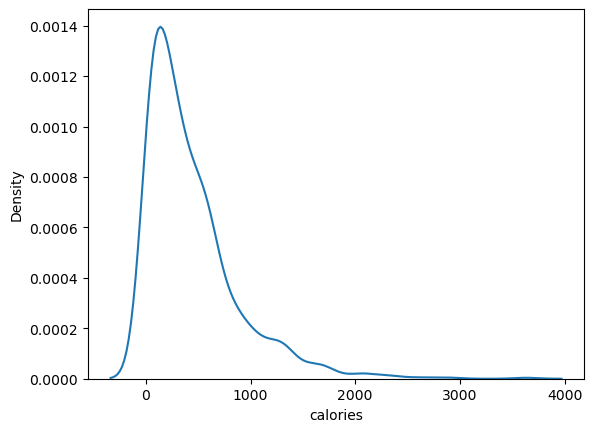

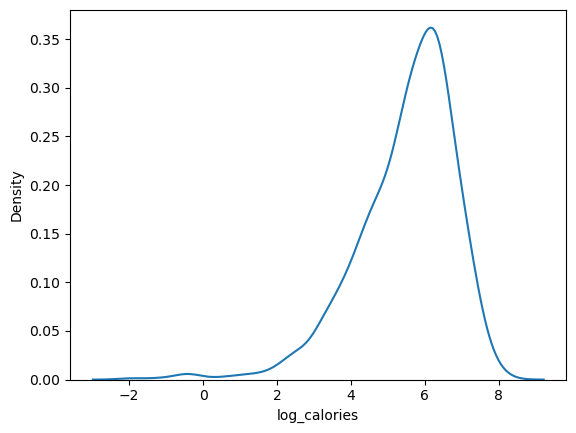

In [36]:
df['log_calories'] = np.log(df['calories'])
sns.kdeplot(data=df, x='calories')
plt.show()
sns.kdeplot(data=df, x='log_calories')
plt.show()

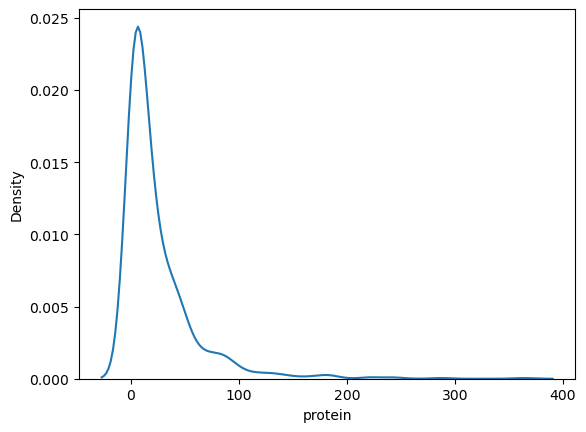

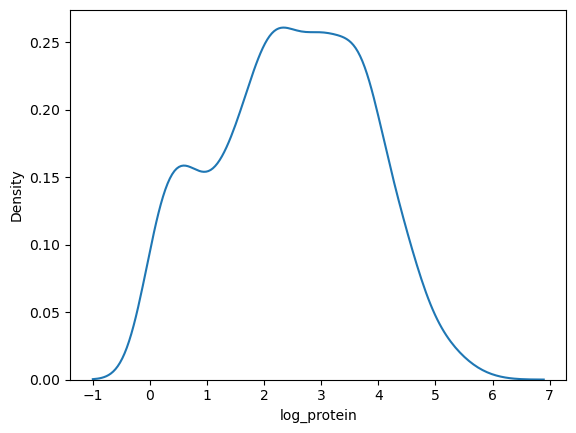

In [37]:
df['log_protein'] = np.log1p(df['protein']) # protein contains 0's
sns.kdeplot(data=df, x='protein')
plt.show()
sns.kdeplot(data=df, x='log_protein')
plt.show()

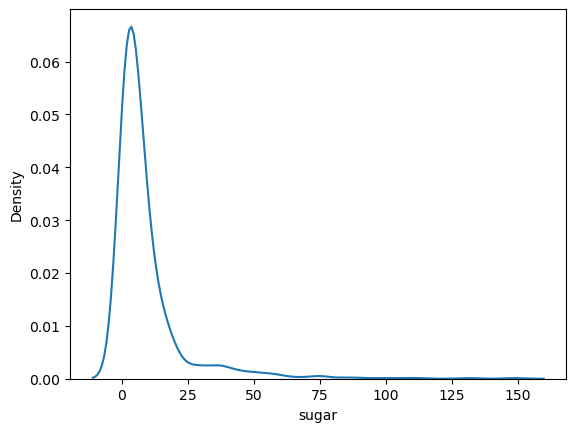

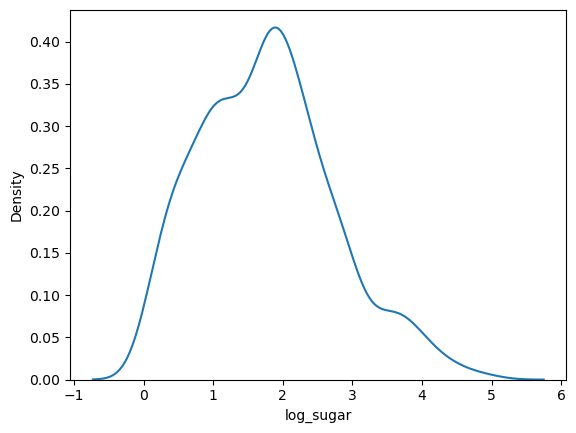

In [38]:
df['log_sugar'] = np.log1p(df['sugar'])
sns.kdeplot(data=df, x='sugar')
plt.show()
sns.kdeplot(data=df, x='log_sugar')
plt.show()

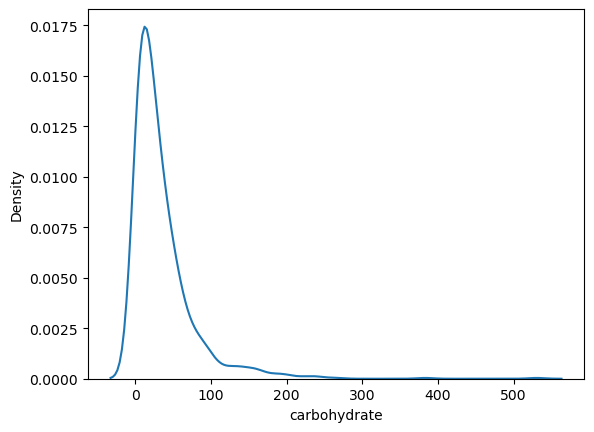

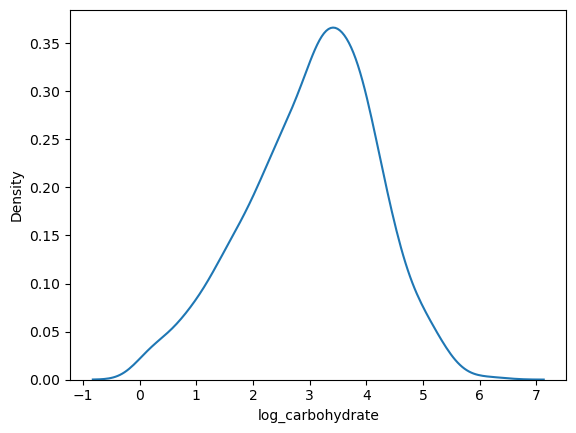

In [39]:
df['log_carbohydrate'] = np.log1p(df['carbohydrate'])
sns.kdeplot(data=df, x='carbohydrate')
plt.show()
sns.kdeplot(data=df, x='log_carbohydrate')
plt.show()

These new log_* features are more symmetric than the originals.

Lets now: 
- get rid of *recipe* id, useless for training
- scale the numeric fields
- encode the *category* and *servings* features

In [40]:
df.head(20)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,log_calories,log_protein,log_sugar,log_carbohydrate
0,1,629.708082,28.076164,8.040137,43.797671,Pork,6,1,6.445256,3.802156,2.201674,3.369919
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,1,3.568969,0.652325,0.506818,3.677819
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,0,6.818137,1.355835,1.408545,3.776890
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,1,4.575020,0.019803,3.679586,3.451890
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,0,3.297687,0.425268,0.587787,1.047319
5,6,691.150000,3.460000,1.650000,53.930000,One Dish Meal,2,1,6.538357,4.006060,0.974560,1.495149
6,7,183.940000,47.950000,9.750000,46.710000,Chicken Breast,4,0,5.214610,3.865141,2.374906,3.890799
7,8,299.140000,3.170000,0.400000,32.400000,Lunch/Snacks,4,0,5.700912,3.508556,0.336472,1.427916
8,9,538.520000,3.780000,3.370000,3.790000,Pork,6,1,6.288825,1.566530,1.474763,1.564441
9,10,248.280000,48.540000,3.990000,113.850000,Chicken,2,0,5.514557,4.743627,1.607436,3.902780


In [41]:
df = df.drop(['recipe', 'calories', 'sugar', 'protein', 'carbohydrate'], axis=1)

In [42]:
df.head()

,category,servings,high_traffic,log_calories,log_protein,log_sugar,log_carbohydrate
0,Pork,6,1,6.445256,3.802156,2.201674,3.369919
1,Potato,4,1,3.568969,0.652325,0.506818,3.677819
2,Breakfast,1,0,6.818137,1.355835,1.408545,3.776890
3,Beverages,4,1,4.575020,0.019803,3.679586,3.451890
4,Beverages,4,0,3.297687,0.425268,0.587787,1.047319


In [43]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['log_calories', 'log_protein', 'log_sugar', 'log_carbohydrate']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [44]:
numeric_cols

['log_calories', 'log_protein', 'log_sugar', 'log_carbohydrate']

In [45]:
df.head()

,category,servings,high_traffic,log_calories,log_protein,log_sugar,log_carbohydrate
0,Pork,6,1,0.716715,1.018376,0.441775,0.296271
1,Potato,4,1,-1.433230,-1.387886,-1.299636,0.570186
2,Breakfast,1,0,0.995433,-0.850451,-0.373140,0.658322
3,Beverages,4,1,-0.681235,-1.871091,1.960282,0.369195
4,Beverages,4,0,-1.636006,-1.561343,-1.216443,-1.769965


In [46]:
df_encoded = pd.get_dummies(df, columns=['category', 'servings'], drop_first=True)
df_encoded.head()

,high_traffic,log_calories,log_protein,log_sugar,log_carbohydrate,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_2,servings_4,servings_6
0,1,0.716715,1.018376,0.441775,0.296271,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,-1.433230,-1.387886,-1.299636,0.570186,False,False,False,False,False,False,False,False,True,False,False,True,False
2,0,0.995433,-0.850451,-0.373140,0.658322,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,-0.681235,-1.871091,1.960282,0.369195,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0,-1.636006,-1.561343,-1.216443,-1.769965,False,False,False,False,False,False,False,False,False,False,False,True,False


In [47]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('high_traffic', axis=1)
y = df_encoded['high_traffic']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize models and parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

# Loop through models
for model_name, model in models.items():
    print(f"\nTraining Model: {model_name}")
    
    # For Logistic Regression and Random Forest, perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print results
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_test)}")
    print(classification_report(y_test, y_pred_test))


Training Model: Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Ke

In [52]:
# Define the best parameters from the previous grid search
current_best_params = {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create a refined parameter grid for Logistic Regression
refined_param_grid = {
    'C': [80, 100, 120],  # Narrowing around the best C
    'penalty': ['l2'],  # Keeping the same penalty
    'solver': ['lbfgs', 'liblinear']  # Retaining the previously successful solvers
}

# Initialize Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, class_weight={0: 2, 1: 1})

# Create grid search for refined Logistic Regression
refined_lr_grid_search = GridSearchCV(estimator=logistic_model, param_grid=refined_param_grid, 
                                       scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search
refined_lr_grid_search.fit(X_train, y_train)

# Get the best refined Logistic Regression model and parameters
best_refined_lr_model = refined_lr_grid_search.best_estimator_
best_refined_lr_params = refined_lr_grid_search.best_params_

# Make predictions on the test set
refined_lr_y_pred = best_refined_lr_model.predict(X_test)

# Calculate training accuracy
train_accuracy = best_refined_lr_model.score(X_train, y_train)

# Print results for refined Logistic Regression
print("Refined Logistic Regression:")
print(f"Best Parameters: {best_refined_lr_params}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, refined_lr_y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, refined_lr_y_pred)}")
print(classification_report(y_test, refined_lr_y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Refined Logistic Regression:
Best Parameters: {'C': 80, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy: 0.7292
Test Accuracy: 0.7474
Confusion Matrix:
[[66 11]
 [37 76]]
              precision    recall  f1-score   support

           0       0.64      0.86      0.73        77
           1       0.87      0.67      0.76       113

    accuracy                           0.75       190
   macro avg       0.76      0.76      0.75       190
weighted avg       0.78      0.75      0.75       190



The overall accuracy of this first trained model with the available data is 75% meaning that we can predict a recipe will be popular or not around 3 out of 4 times. On the other hand after playing a bit with the class weights, the precision of this model is around 87%, so when we say a recipe is popular, it will be popular 87 times out of 100.

In [55]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_refined_lr_model.coef_[0]
})

# Display feature importance sorted by absolute value
feature_importance['Importance'] = feature_importance['Importance'].abs()  # Optional: for magnitude sorting
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                    Feature  Importance
13       category_Vegetable    6.804821
12          category_Potato    5.419647
11            category_Pork    5.112480
9             category_Meat    3.527433
10   category_One Dish Meal    3.518670
8     category_Lunch/Snacks    3.255412
7          category_Dessert    3.203687
6   category_Chicken Breast    2.573944
5          category_Chicken    1.974935
4        category_Breakfast    1.846300
14               servings_2    0.304372
15               servings_4    0.260116
0              log_calories    0.090745
3          log_carbohydrate    0.062896
1               log_protein    0.029656
16               servings_6    0.020560
2                 log_sugar    0.016647


/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_5790/1019202407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


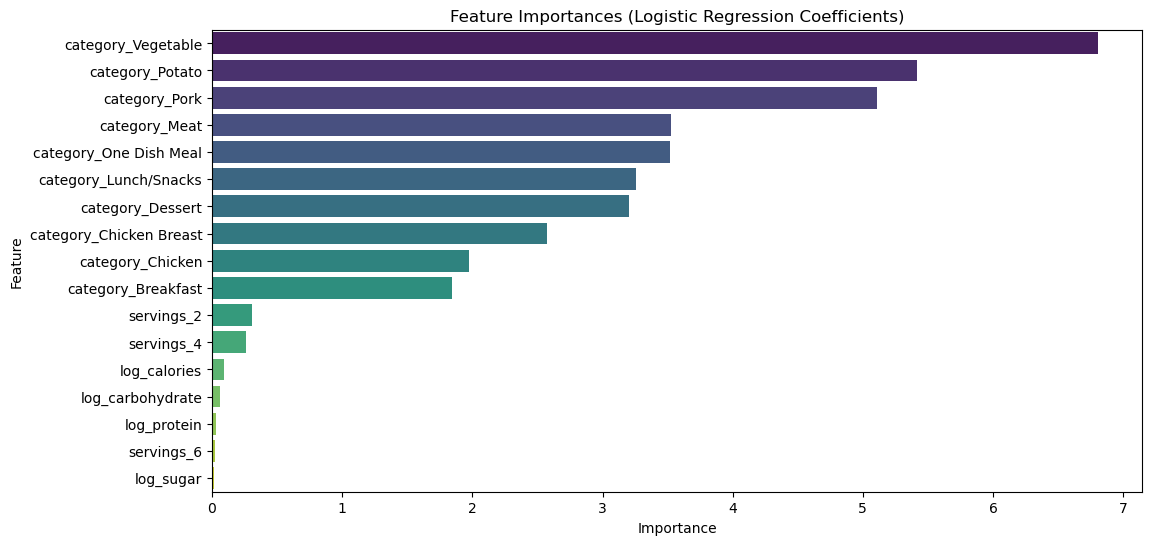

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importances (Logistic Regression Coefficients)')
plt.show()